In [99]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
dataset = load_iris()

In [101]:
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])

In [102]:
t = pd.DataFrame(dataset['target'], columns=['Classes'])

In [103]:
df = pd.concat([df,t], axis=1)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Classes            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [105]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Classes
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [106]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


As we are learning binary classification, let us remove one class

In [107]:
df_copy = df[df['Classes'] !=2]

In [108]:
df_copy['Classes'].value_counts()

0    50
1    50
Name: Classes, dtype: int64

# Dependent And Independent Features

In [109]:
X = df_copy.iloc[: , :4]

In [110]:
Y = df_copy.iloc[: , -1]

# TRain Test Split

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [113]:
classifier = LogisticRegression()

In [114]:
classifier.fit(x_train, y_train)

LogisticRegression()

In [115]:
y_pred = classifier.predict(x_test)

In [116]:
r2 = r2_score(y_true=y_test, y_pred=y_pred)

In [119]:
acc =accuracy_score(y_test, y_pred)

In [123]:
report = classification_report(y_test, y_pred)

In [125]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [126]:
y_train_pred = classifier.predict(x_train)

In [127]:
acc2 = accuracy_score(y_train, y_train_pred)

In [128]:
acc2

1.0

In [129]:
classifier.predict_proba(x_test)

array([[0.33220476, 0.66779524],
       [0.96713537, 0.03286463],
       [0.21235298, 0.78764702],
       [0.12839275, 0.87160725],
       [0.97808853, 0.02191147],
       [0.06278279, 0.93721721],
       [0.00706746, 0.99293254],
       [0.98177175, 0.01822825],
       [0.97748433, 0.02251567],
       [0.98548393, 0.01451607],
       [0.03157799, 0.96842201],
       [0.08256615, 0.91743385],
       [0.98060715, 0.01939285],
       [0.01906521, 0.98093479],
       [0.97909945, 0.02090055],
       [0.0225123 , 0.9774877 ],
       [0.99301704, 0.00698296],
       [0.9594217 , 0.0405783 ],
       [0.98472368, 0.01527632],
       [0.99483989, 0.00516011],
       [0.23336535, 0.76663465],
       [0.03641754, 0.96358246],
       [0.97888701, 0.02111299],
       [0.01499409, 0.98500591],
       [0.01443484, 0.98556516]])

HyperParameter Tuning

In [131]:
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

In [136]:
parameters = {'penalty' : ('l1', 'l2', 'elasticnet', None),
              'C' : [1, 10, 20],}

In [138]:
clf = GridSearchCV(classifier, param_grid=parameters, cv = 5)

In [139]:
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20],
                         'penalty': ('l1', 'l2', 'elasticnet', None)})

In [146]:
clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [148]:
classifier = LogisticRegression(C=1 ,penalty='l2')

In [149]:
classifier.fit(x_train, y_train)

LogisticRegression(C=1)

In [150]:
y_pred = classifier.predict(x_test)

In [151]:
acc3 = accuracy_score(y_test, y_pred)

In [154]:
a = classifier.predict_proba(x_test)

<AxesSubplot: >

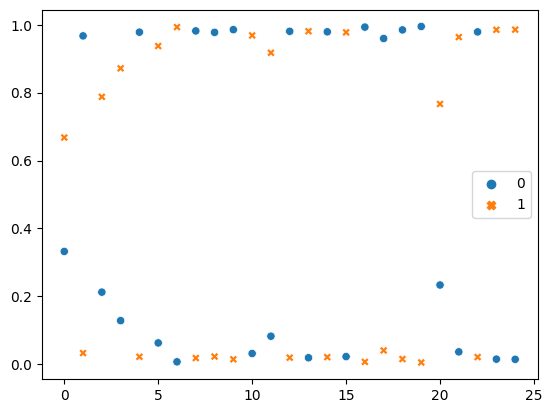

In [155]:
sns.scatterplot(a)

Randomised Search CV

In [157]:
from sklearn.model_selection import RandomizedSearchCV

In [195]:
randomclf = RandomizedSearchCV(LogisticRegression(), param_distributions=parameters, cv=5)

In [196]:
randomclf.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 10, 20],
                                        'penalty': ('l1', 'l2', 'elasticnet',
                                                    None)})

In [197]:
randomclf.best_params_

{'penalty': None, 'C': 10}

In [198]:
classifier = LogisticRegression(penalty=None, C=20)

In [199]:
classifier.fit(x_train, y_train)

LogisticRegression(C=20, penalty=None)

In [201]:
y_pred = classifier.predict(x_test)

In [202]:
acc4 = accuracy_score(y_test, y_pred)

In [203]:
acc4

1.0

# Multiclass Prediction

In [205]:
X = df.iloc[:, :4]

In [207]:
Y = df.iloc[:, -1]

In [209]:
x_train,x_test, y_train,y_test = train_test_split(X, Y, test_size=0.25)

In [210]:
model = LogisticRegression(multi_class="multinomial", solver="lbfgs")

In [211]:
model.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [213]:
y_pred = model.predict(x_test)

In [215]:
acc6 = accuracy_score(y_test, y_pred)

In [217]:
acc6

0.9736842105263158

In [220]:
y_pred

array([0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1])

In [219]:
model.predict_proba(x_test)

array([[9.43433891e-01, 5.65656476e-02, 4.61049391e-07],
       [8.18435408e-03, 8.12244518e-01, 1.79571128e-01],
       [3.64885232e-02, 9.40186848e-01, 2.33246290e-02],
       [4.48956231e-04, 2.71374956e-01, 7.28176088e-01],
       [1.28465834e-03, 5.64236786e-01, 4.34478556e-01],
       [1.01194213e-08, 1.08223475e-03, 9.98917755e-01],
       [1.37174612e-06, 1.56814922e-02, 9.84317136e-01],
       [4.00650362e-03, 7.66256806e-01, 2.29736690e-01],
       [8.74474320e-02, 9.07411358e-01, 5.14120988e-03],
       [1.95305379e-04, 8.86659438e-02, 9.11138751e-01],
       [5.21447492e-03, 8.70385263e-01, 1.24400262e-01],
       [1.05101691e-03, 4.07452839e-01, 5.91496144e-01],
       [3.33863058e-03, 7.54413877e-01, 2.42247492e-01],
       [9.79513495e-01, 2.04864540e-02, 5.09920043e-08],
       [9.36852639e-04, 3.23336247e-01, 6.75726900e-01],
       [1.21830512e-04, 8.50187915e-02, 9.14859378e-01],
       [9.50698270e-01, 4.93012020e-02, 5.28519250e-07],
       [2.07452148e-02, 8.93188